<a href="https://colab.research.google.com/github/Rerzd/Ciencia_Datos_intro/blob/main/Estimaci%C3%B3n_de_variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimación de variabildiad

## 1. Varianza
suma de los cuadrados de las desviaciones de la media al cuadrado dividida por n-1, donde **n** es el número de valores de datos
## 2. desviación estándar
Raís cuadrada de varianza. el rango de variación
## 3. Desviación media absoluta
Media de valores absolutos de las desviaciones de la media
## 4. Desviación absoluta de la mediana (MAD)
Mediana de los valores absolutos de las desviaciones de la mediana
## 5. Rango
La diferencia entre el valor máximo y mínimo de un conjunto de datos
## 6. Estadística ordinal
Métricas basadas en los valotes de datos ordenados de mayor a menor
## 7. percentil
Valor tal que P por cierto de los valores toma este valor o a un valor inferior y para (100-p) el porcentaje toma este valor superior
## 8. Rango intercuartil (IQR)
Diferencia entre el percentil 75 y el percentil 25

In [ ]:
#Cargar dato desde google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install statsmodels
!pip install wquantiles

In [ ]:
import pandas as pd
import numpy as np
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CIENCIA DE DATOS /state.csv")

In [ ]:
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
data.tail()

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [ ]:
data.sample(3)

,State,Population,Murder.Rate,Abbreviation
3,Arkansas,2915918,5.6,AR
15,Kansas,2853118,3.1,KS
4,California,37253956,4.4,CA


###Overview

In [ ]:
# Cuáles features se están treabajando
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [ ]:
#Generar cálculos de desviación estándar y cuantiles
data["Population"].std()

6848235.347401142

In [ ]:
mayor_poblacion = data.groupby("Population").max()

In [ ]:
mayor_poblacion

,State,Murder.Rate,Abbreviation
Population,,,
563626,Wyoming,2.7,WY
625741,Vermont,1.6,VT
672591,North Dakota,3.0,ND
710231,Alaska,5.6,AK
814180,South Dakota,2.3,SD
897934,Delaware,5.8,DE
989415,Montana,3.6,MT
1052567,Rhode Island,2.4,RI
1316470,New Hampshire,0.9,NH


In [ ]:
#Calcular el IQR
data.Population.quantile(0.75) - data.Population.quantile(0.25)

np.float64(4847308.0)

In [ ]:
robust.scale.mad(data.Population)

np.float64(3849876.1459979336)

##Exploración de la distribución de datos
En este apartado hay
1. diagrama de caja: Visibilización rápida de la distribución de datos
2. DIageama de fecuencuas: registro de recuento de valores de datos numéricos que caen en un conjunto de intervalos
3. Histograma: Diagrama de tabla de fecuencias con los que los intervalos en eje x y y
4. Diagrama de densidad: versión suavizada

In [ ]:
#calcular percentiles de la tasa de homicidios por estado
data["Murder.Rate"].quantile([0.25, 0.75])

,Murder.Rate
0.25,2.425
0.75,5.550


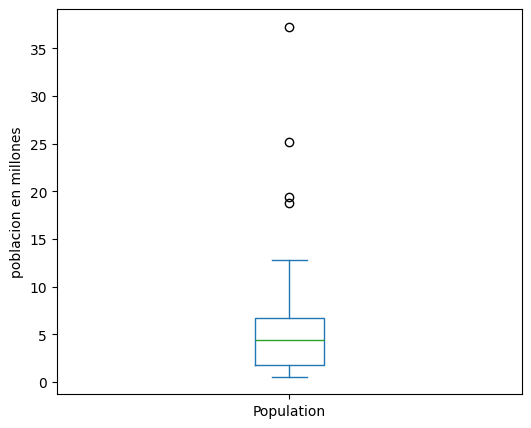

In [ ]:
#Dibujando un boxplot
ax = (data.Population/1_000_000).plot.box(figsize=(6,5))
ax = ax.set_ylabel("poblacion en millones")

In [ ]:
#calculando tabla de frecuencias e histogramas
binnedPopulation=pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


Text(0, 0.5, 'poblacion en millones')

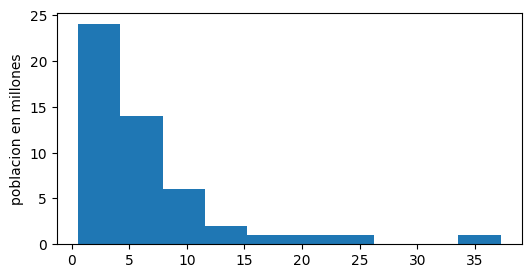

In [ ]:
ax=(data["Population"]/1_000_000).plot.hist(figsize=(6,3))
ax.set_ylabel("poblacion en millones")

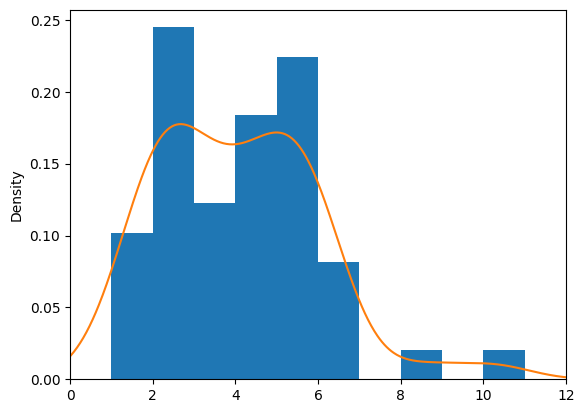

In [ ]:
#Diagrama de dispersión y curva de densidad
ax = data["Murder.Rate"].plot.hist(density = True, xlim=[0,12], bins = range(1,12))
data ["Murder.Rate"].plot.density(ax=ax)
ax.set_label("Tasa de asesinatos por cada millón de habitantes")